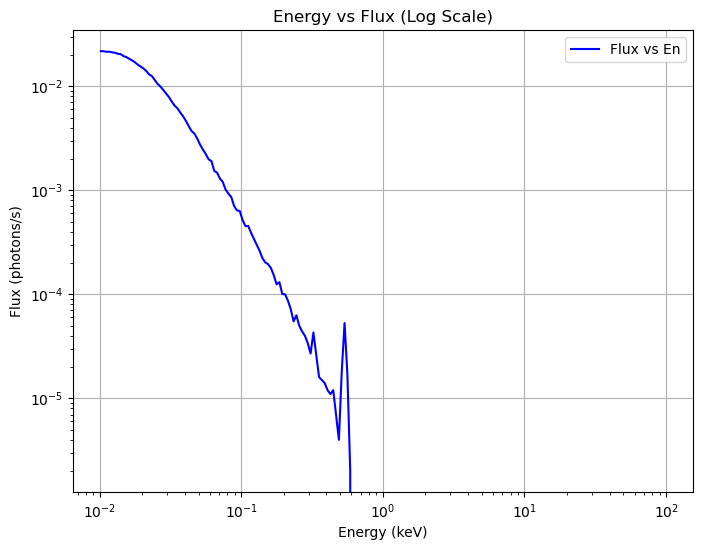

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import struct
import os

# 读取 .dat 文件并解析其中的数据
def load_dat_file(file_path):
    """
    读取二进制 .dat 文件并解析其中的数据（假设数据是双精度浮动点数）。
    
    :param file_path: 文件路径
    :return: 解析后的数据（列表）
    """
    # 检查文件是否存在
    if not os.path.exists(file_path):
        print(f"文件 {file_path} 不存在！")
        return None

    # 打开文件并读取内容
    with open(file_path, "rb") as f:
        data = f.read()

    # 计算数据项的数量
    num_items = len(data) // 8  # 假设每个数据项是一个 double 类型，占 8 字节

    # 解析二进制数据，假设文件中的数据是双精度浮动点数
    result = struct.unpack("<" + "d" * num_items, data)

    return result

# 示例：指定要查看的 .dat 文件路径
base_file_path = r"\\wsl.localhost\Ubuntu-22.04\home\hdw\data\monk\plot\warmcorona\test\test_smooth_10_6\data"
sub_dir = os.path.join(f"te_0.500_tau_15.000", "calspec")

file_path_en = os.path.join(base_file_path, sub_dir, "en.dat")
file_path_flux = os.path.join(base_file_path, sub_dir, "flux.dat")
file_path_de = os.path.join(base_file_path, sub_dir, "de.dat")

file_path_flux_smoothed_lowess = r"\\wsl.localhost\Ubuntu-22.04\home\hdw\data\monk\plot\warmcorona\test\test_smooth_10_6\data\te_1.500_tau_15.000\calspec\flux_smoothed_lowess.dat"

file_path_flux_smoothed_butter = r"\\wsl.localhost\Ubuntu-22.04\home\hdw\data\monk\plot\warmcorona\test\test_smooth_10_6\data\te_1.500_tau_15.000\calspec\flux_smoothed_butter.dat"


en = load_dat_file(file_path_en)
flux = load_dat_file(file_path_flux)
#flux_smoothed_lowess = load_dat_file(file_path_flux_smoothed_lowess)
#flux_smoothed_butter = load_dat_file(file_path_flux_smoothed_butter)
de = load_dat_file(file_path_de)

#file_path_en_10_7 = r"\\wsl.localhost\Ubuntu-22.04\home\hdw\data\monk\plot\warmcorona\test\test_smooth\data\te_1.000_tau_15.000\calspec\10_7\calspec\en.dat"
#file_path_flux_10_7 = r"\\wsl.localhost\Ubuntu-22.04\home\hdw\data\monk\plot\warmcorona\test\test_smooth\data\te_1.000_tau_15.000\calspec\10_7\calspec\flux.dat"
#file_path_de_10_7 = r"\\wsl.localhost\Ubuntu-22.04\home\hdw\data\monk\plot\warmcorona\test\test_smooth\data\te_1.000_tau_15.000\calspec\10_7\calspec\de.dat"

#en_10_7 = load_dat_file(file_path_en_10_7)
#flux_10_7 = load_dat_file(file_path_flux_10_7)
#de_10_7 = load_dat_file(file_path_de_10_7)

# 检查数据是否加载成功
if en is None or flux is None or de is None:
    print("数据加载失败！")
else:
    # 计算 flux 和 de 的乘积
    flux_de = np.multiply(flux, de)
  #  flux_de_smoothed_lowess = np.multiply(flux_smoothed_lowess, de)
  #  flux_de_smoothed_butter = np.multiply(flux_smoothed_butter, de)
  #  flux_de_10_7 = np.multiply(flux_10_7, de_10_7)
#    flux_de_10_6_1 = np.multiply(flux_10_6_1, de)
    # 绘制图形
    plt.figure(figsize=(8, 6))
    plt.plot(en, flux_de, label="Flux vs En", color='b')
   # plt.plot(en, flux_de_smoothed_lowess, label="Flux vs En_smoothed_lowess", color='g',linestyle = ':')
   # plt.plot(en, flux_de_smoothed_butter, label="Flux vs En_smoothed_butter", color='c',linestyle = '-.')
   # plt.plot(en, flux_de_10_7, label="Flux vs En_10_7", color='m',linestyle = '--')
    plt.xlabel("Energy (keV)")  # X轴标签
    plt.ylabel("Flux (photons/s)")  # Y轴标签
    plt.title("Energy vs Flux (Log Scale)")
    
    # 设置对数刻度
    plt.yscale("log")
    plt.xscale("log")
    plt.grid(True)
    plt.legend()
    plt.show()